<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/12/ML_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# TensorFlow - Keras

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
</ol>

## Способы создания нейросетей

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras


## TensorFlow

Практически самый популярный фреймворк для создания нейросетей TensorFlow (первое место пополам с PyTorch). 
TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.
Keras как правило работает поверх базовых концептов TensorFlow и с 2019 входит в состав TensorFlow.


## Keras

Keras появился в 2015 г. Но за это время стал одним из самых популярных фреймоворков. Keras позволяет создовать на высоком уровне абстракции. Т.е. на не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В тоже время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения. В 2019г произошла интеграция отдельного фреймвока в состав пакетов TensorFlow ( но доступен и неплохой самостоятельный фреймворк - его не поддерживается с 2021г). 

## Основы синтаксиса

## **Установка и работа с данными**

In [ ]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install tf-nightly

In [2]:
#Специфично для колаборатории - переключились на TensorFlow 2

%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Выведем строку Hello world, а также версию tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.9.2
TensorFlow 2.0 Hello World


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов.  

## Базовый синтаксис Tensorflow 2.

## Тензоры

Тензоры схожи с ndarrays в NumPy, с добавлением того, что тензоры могут быть использованы на GPU для ускорения вычислений.

### **Тензор**

Тензор - основная структура данных в библиотеках машинного обучения, которая похожа на массив Numpy. Что-то вроде n-мерной матрицы или массива массивов.Тензоры обеспечивают ускорение различных математических операций. Эти операции при выполнении в большом количестве в глубоком обучении имеют огромное значение в скорости.

В Тензорфлоу Тензор создается и поддерживается классам tf.Tensor(op, value_index, dtype):
Все элементы относятся к одному известному типу данных. tf.Tensor обладает следующими свойствами:

  - dtype - один тип данных (например, float32, int32 или string)
  - shape - форма


Пример создания тензора:

- Создает постоянный тензор из тензороподобного объекта.


  tf.constant( value, dtype=None, shape=None, name='Const')
  

In [4]:
A = tf.constant( [[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


  - Конструктору Variable() требуется начальное значение переменной, которое может быть Tensor любого типа и формы. Это начальное значение определяет тип и форму переменной. После построения фиксируются тип и форма переменной. Значение можно изменить с помощью одного из методов присваивания.

In [5]:
w = tf.Variable([[1.], [2.]])
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Тензор, заполненный только единицами

In [6]:
x = tf.ones(shape=(3, 2, 1))
print(x)

tf.Tensor(
[[[1.]
  [1.]]

 [[1.]
  [1.]]

 [[1.]
  [1.]]], shape=(3, 2, 1), dtype=float32)


Тензор, заполненный только нулями:

In [7]:
x = tf.zeros(shape=(2, 2,3))
print(x)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]], shape=(2, 2, 3), dtype=float32)


Cлучайные тензоры

In [8]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.03379695]
 [-0.5577445 ]
 [-0.00441124]], shape=(3, 1), dtype=float32)


In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.2500554 ],
       [0.00304395],
       [0.8693019 ]], dtype=float32)>


Состояние переменной можно изменить с помощью метода assign

In [10]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Пример изменения размерности тензора - 

In [12]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [2, 4]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2]
 [9 5 1 3]]


Пример сложения тензoров - 

In [13]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Для переменных можно еще и так (добавить к тому. что есть)

In [14]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [15]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


In [16]:
x = tf.matmul([[5]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Можно много всякого похожего на numpy

In [17]:
a = tf.ones((2, 2)) * 2
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)



tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


Пример:

In [18]:
import numpy as np

ndarray = np.ones([3, 3])

print("превратим numpy arrays в Tensors ")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор в  numpy array")
print(tensor.numpy())

превратим numpy arrays в Tensors 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор в  numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


Полный список функций можно посмотреть в официальном источнике https://www.tensorflow.org/api_docs/python/tf (ядро платформы и основные рабочие классы и функции)

## Задание 1

In [ ]:
# 1. Создайте случайный Float размера 3x4x5

In [ ]:
# 2. Выведите его форму (shape)

In [ ]:
# 3. Приведите его к форме 6х10

In [ ]:
# 4. Создайте случайный Int размера 10

In [ ]:
# 5. Умножьте созданный Float на созданный Int поэлементно

In [ ]:
# 6. Умножьте тензор матрично на себя, чтобы результат был размерности 6x6

In [ ]:
# 8. Создайте единичный тензор размера 5x6

In [ ]:
# 9. Переведите его в формат numpy

Работа с графическими ускорителями (если они есть):

  -  проверить существование
  -  по автомату всегда старается использовать графические ускорители
  -  можно включать и отключать принудительно 

Проверяем работу GPU

https://www.tensorflow.org/guide/gpu

In [19]:
x = tf.random.uniform([3, 3]) # равномерно случайный тензор размера (3,3)

print("есть ли доступные GPU: ")
print(tf.config.experimental.list_physical_devices("GPU"))


print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0')) #  принудительно назначаем устройство GPU:0 - из списка доступных GPU


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


Сделаем по 10 циклов на GPU и CPU:

In [20]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 циклов: {:0.2f}ms".format(1000*result))

# исполнение CPU
print(" CPU работает:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print(" какой GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

 CPU работает:
10 циклов: 302.99ms
 какой GPU:
10 циклов: 12.55ms


## Вычислительный граф и Автоматическое диференцирование



Вычислительный граф — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Автоматическое дифференцирование - строительный блок не только в TensorFlow но и в каждой другой DL библиотеке. Движок автоматического дифференцирования в TensorFlow называет [GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape). 

Современные архитектуры нейронных сетей могут иметь миллионы обучающихся параметров. С вычислительной точки зрения тренировка сети состоит из двух фаз:

1) Прямой проход для вычисления значения функции потерь.  
2) Обратный проход для вычисления градиентов обучаемых параметров.

Прямой проход весьма прямолинеен: выход одного слоя является входом другого.
Обратный проход немного сложнее, поскольку он требует от нас использования цепного правила для вычисления градиентов весов относительно функции потерь.

Ниже представлен простой пример вычислительного графа для вычисления выражения $\sigma(x*w_1 + w_0)$. Можно разбить вычисление на следующие шаги:

<img src='https://drive.google.com/uc?export=view&id=1jCTO6zBGyE8sYkkSv_6NENdFOiwuJCMC' width=600>

Преимущества использования вычислительного графа в том, что каждый узел является независимым функционирующим куском кода, если получит все необходимые входные данные. Это позволяет  оптимизировать производительность при выполнении расчетов, используя многоканальную обработку, параллельные вычисления.В Тензорфлоу граф создается и поддерживается объектом tf.Graph() - https://www.tensorflow.org/api_docs/python/tf/Graph

TensorFlow поддерживает "нетерпеливое" динамическое выполнение и "статическое" выполнение графа. При нетерпеливом выполнении операции оцениваются немедленно. При статическом выполнении - сначала строится граф, а потом идет обработка.
Динамические графы удобно отлаживать и контролировать, статические графы работают быстрее.

**ГЛАВНЫЙ ФОКУС!!!**
Вычисляем производные (для дифференцируемых функций) автоматически по всему запомненному графу вычислений

In [ ]:
input_var = tf.Variable(initial_value=3.) # входная переменная функции (х - вещественное число - тензор)
with tf.GradientTape() as tape:  # создаем объект для слежения (записи) тензорных связей и зависимостей 
   result = tf.square(input_var)  # вычисляем функцию у = (х ** 2)
gradient = tape.gradient(result, input_var)  # вычисляем производную у по х (аргументы : 1- результат работы функции, 2- значение входной переменной)

print('input_var : ',input_var)
print('result = input_var^2 : ',result)
print('gradient : ',gradient)


input_var :  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result = input_var^2 :  tf.Tensor(9.0, shape=(), dtype=float32)
gradient :  tf.Tensor(6.0, shape=(), dtype=float32)


## Задание 2

In [1]:
# 1. Посчитайте производную функции y = x**3  в точке x = ( 0.5)

In [ ]:
# 2. Посчитайте производную функции y = x[0]**3 + x[1] - 75*x[2] в точке x = (1, 0.5, 2)

Производная второго порядка:

In [21]:
import numpy as np
import matplotlib.pyplot as plt

input_t = tf.Variable(np.arange(10), dtype='float32') # t  входная переменная функции (вектор моментов времени от 0 до 9 секунд - вещественных чисел - тензор)
with tf.GradientTape() as outer_tape: # создаем объект1 для слежения (записи) тензорных связей и зависимостей (вторая производная)
  with tf.GradientTape() as inner_tape: # создаем объект2 для слежения (записи) тензорных связей и зависимостей (первая производная)
    x =  4.9 * input_t ** 2  # g * t^2 /2   функция от входной переменной (перемещение)
  speed = inner_tape.gradient( x, input_t)  # g * t  первая производная (скорость)
acceleration = outer_tape.gradient(speed, input_t)   # g вторая производная (ускорение)

# отобразим
print('x : ',x)
print('t : ',input_t)
print('v : ',speed)
print('a : ',acceleration)

x :  tf.Tensor(
[  0.         4.9       19.6       44.100002  78.4      122.49999
 176.40001  240.09999  313.6      396.9     ], shape=(10,), dtype=float32)
t :  <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>
v :  tf.Tensor(
[ 0.        9.8      19.6      29.400002 39.2      49.       58.800003
 68.600006 78.4      88.200005], shape=(10,), dtype=float32)
a :  tf.Tensor([9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8], shape=(10,), dtype=float32)


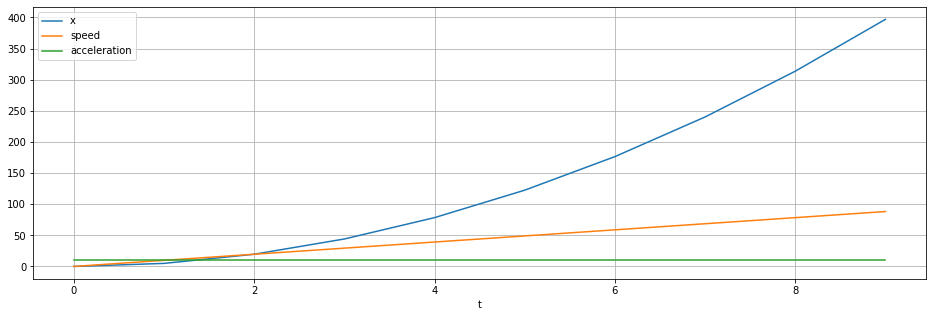

In [22]:
plt.figure(figsize=(16,5))
plt.plot(input_t.numpy(), x.numpy(), label = 'x')
plt.plot(input_t.numpy(), speed.numpy(), label = 'speed')
plt.plot(input_t.numpy(), acceleration.numpy(), label = 'acceleration')
plt.legend()
plt.xlabel('t')
plt.grid('on')
plt.show()

## Задание 3

In [ ]:
# 1. Посчитайте 2-ю производную функции y = x**3  в точке x = ( 0.5)

## **Создание нейронной сети в Keras**

**Создание модели**

Все модели создаем на основе классов (и в самом глубоком уровне наследований от tf.Module()) , но возможно 3 пути:
- описание модели как модели линейной через Керас в классе tf.keras.Sequential()
- описание модели в функциональном стиле на основе базовых объектов слоев и Керас класса tf.keras.Model(), 
- ООП нейросеть tf.Module()

каждый вариант имеет свои достоинства и недоствтки:
  - линейные сети просто создавать. но они слишком простые
  - функциональные сети дают массу вариантов для построения сложных графов вычислений и остаются в классическом процессе обучения керас
  - ООП тензорфлоу реализации - полноценное объектно-ориентированное решение с широким списком возможных кастомизаций модели

Ниже типичный код нейросети - на основе объекта Sequential() :

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Команды в этом коде.

  - **Sequential** - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках. имеет методы https://www.tensorflow.org/api_docs/python/tf/keras/Sequential:
 - model = tf.keras.**Sequential()** - конструктор - создает пустую линейную сеть
 - model = tf.keras.**Sequential**([слой1,слой2, ..., слойm]) - создает сеть из списка объектов слоев (каждый элемент списка объект наследник класса )
 - **.add**(< передаем объект слой >) - добавляет слой к модели (в конец)
 - **.pop()** Удаляет последний слой в модели

  - **Dense** (создает объект класса https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense наследник базового класса слой tf.keras.layers.Layer()) - позволяет каждому нейронну быть связанному с другим нейронном. Образует плотную карту связей с нейронами следующего слоя (все со всеми). Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое. Аргументы:
    - **units**	Положительное целое число, размерность выходного пространства (без этого не работает, остальные можно пропускать).
    - **activation**	Функция активации слоя (однаковая на весь слой у каждого из нейронов). Если вы ничего не укажете, активация не будет применена (т.е. "линейная" активация: ). a(x) = x
    - **use_bias** = 	Boolean, указывает, использует ли слой вектор смещения.
    - **kernel_initializer**	Инициализатор kernel матрицы весов (в Керас есть богатый список инициализаторов).
    - **kernel_regularizer**	Функция регуляризатора применяется к kernel матрице весов (в Керас есть богатый список регулялизаторов).


  - **Activation** - позволяет определить формулу по которой будет активироваться нейрон.

  - все слои наследуются от класса tf.keras.layers.**Layer**( trainable=True, name=None, dtype=None, dynamic=False, **kwargs), а он наследуется от Module https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer




**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Пример:

    
    # создание keras модели - берем объект нейронная сеть и вызываем метод .compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

На этой стадии мы должны сделать настройки процесса обучения нейронной сети:

  - **loss** - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети (в Керас есть богатый список вариантов потерь https://www.tensorflow.org/api_docs/python/tf/keras/losses).

  - **optimizer** - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети backpropagation (в Керас есть богатый список вариантов оптимизаторов https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

  - **metrics** - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети (в Керас есть богатый список вариантов метрик https://www.tensorflow.org/api_docs/python/tf/keras/metrics).
    
необходимо подбирать метрику и потери в соответствии с задачей.    

Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…

Функции потерь:
* CategoricalCrossentropy()
* SparseCategoricalCrossentropy()
* BinaryCrossentropy()
* MeanSquaredError()
* KLDivergence()
* CosineSimilarity()
…

Метрики:
* CategoricalAccuracy()
* SparseCategoricalAccuracy()
* BinaryAccuracy()
* AUC()
* Precision()
* Recall()
…

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения и вызвать метод .fit(), в который передают следующие параметры:

.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

 - **x**	Входные данные:
    - Массив Numpy (или похожий на массив) или список массивов (в случае, если модель имеет несколько входных данных).
    - Тензор TensorFlow или список тензоров (в случае, если модель имеет несколько входных данных).
    - Словарь, отображающий входные имена в соответствующие массивы/тензоры, если модель имеет именованные входные данные.
    - Набор tf.data данных. Должен возвращать кортеж либо , (inputs, targets)либо (inputs, targets, sample_weights).
    - Генератор или keras.utils.Sequence возврат (inputs, targets)или (inputs, targets, sample_weights).
  - **y**	Целевые данные: число экземпляров как в x, это могут быть:
    - массивы Numpy или тензоры TensorFlow. 
    - если передаем генератор, то этот параметр пропускаем, но генератор должен возвращать кортеж из пары экземпляров из Х и у
  - **batch_size**	Целое или None. по умолчанию будет 32. Не указывайте, если ваши данные представлены в виде наборов данных, генераторов (поскольку они генерируют пакеты). 
  - **epochs**	Целое. Количество эпох для обучения модели. Эпоха — это итерация по всем x и y предоставленным данным 
  - **verbose**	'авто', 0, 1 или 2. Режим детализации. 0 = без звука, 1 = индикатор выполнения, 2 = одна строка в эпоху. 'auto' по умолчанию имеет значение 1 в большинстве случаев.
  - **callbacks**	Список keras.callbacks.Callback экземпляров. Список обратных вызовов для применения во время обучения. 
  - **validation_split**	Плавающее значение от 0 до 1. Доля обучающих данных, которые будут использоваться в качестве данных проверки. Модель будет выделять эту часть обучающих данных, не будет обучаться на ней и будет оценивать потери и любые метрики модели на этих данных в конце каждой эпохи. Данные проверки выбираются из последних выборок в x предоставленных yданных и перед перемешиванием. Этот аргумент не поддерживается, если x это набор данных, генератор.
  - **validation_data	**Данные для оценки потерь и любые метрики модели в конце каждой эпохи. Модель не будет обучаться на этих данных.

  - **class_weight**	Необязательный словарь, отображающий индексы класса (целые числа) в весовое (плавающее) значение, используемое для взвешивания функции потерь (только во время обучения). Это может быть полезно, чтобы указать модели «уделять больше внимания» образцам из недопредставленного класса.

  - sample_weight	Необязательный массив весов Numpy для обучающих выборок, используемый для взвешивания функции потерь (только во время обучения).


    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем этот пример.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даных х содержащих, например фотографию в виде массива чисел.    
    

### **Пример:**

### ***Подготовка данных***

Откроем набор данных "рукописные цифры" - это классика
В качестве входных объектов видим картинки 28х28 пикселей (полутоновые), а на выходе должны указать к какому классу принадлежит цифра (метки от 0 до 9)

In [95]:
from tensorflow.keras.datasets import mnist  # импорт функции для загрузки набора данных (это рукописные цифры)


(train_images0,train_labels),(test_images0,test_labels)=mnist.load_data()   # загружаем (вернет кортеж тренировочный примров (изображение, метка) и кортеж тестовых примеров (изображение, метка))

# Нормализация.
train_images0 = (train_images0 / 255) * 2 - 1
test_images0 = (test_images0 / 255) * 2 - 1

# векторизация.
train_images = train_images0.reshape((-1, 784))
test_images = test_images0.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)



(60000, 784)
(10000, 784)


Введем имена классов:

In [96]:
class_names  = [str(i) for i in range(10)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [97]:
import matplotlib.pyplot as plt


Посмотрим на пример:

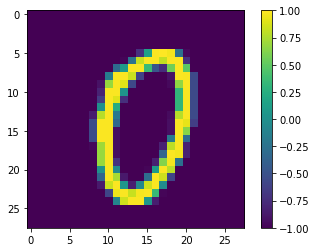

In [98]:
n = 1000
plt.figure()
plt.imshow(train_images0[n])
plt.colorbar()
plt.grid(False)
plt.show()

Посмотрим на несколько примеров и их метки:

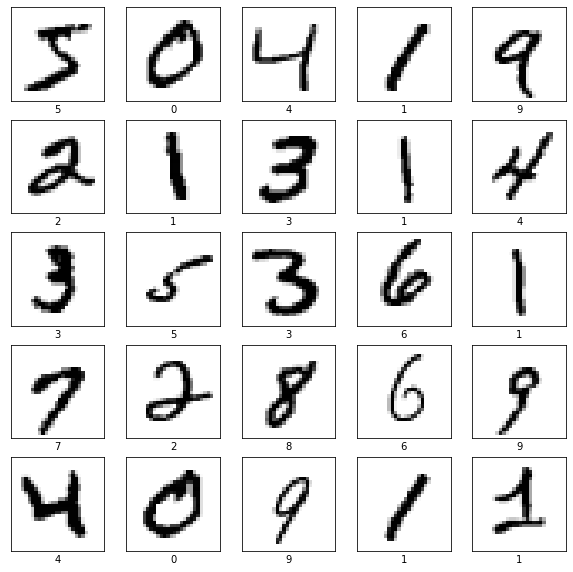

In [99]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images0[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Создадим сеть:**

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [101]:
# создаем линейную модель из списка
bigger_model = Sequential([
    Dense( 512, activation='relu', input_shape=(784,)),    # кроме размера слоя и активации в первом слое стоит указать размер входа input_shape=(784,) - это кортеж , где указана размерность входного объекта (не указываем число объектов, его не знаем)
    Dense(256, activation='linear'),
    Dense(10, activation='softmax')   # на выходе стоит 10 нейронов, т.к. задача классификация цифр и активация activation='softmax' , которую принято использовать в классификации (вернет ответ в вероятностной форме - вероятность каждого выхода)
])
# собираем модель
bigger_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_model.summary()   # метод для отображения списка слоев модели (имя солоя, размер выхода, число параметров)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 512)               401920    
                                                                 
 dense_64 (Dense)            (None, 256)               131328    
                                                                 
 dense_65 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### **Обучаем сеть**

сеть ждет на вход вектор (М, 784) - М объектов по 784 признака ()

In [102]:
bigger_history = bigger_model.fit( train_images, 
                                  to_categorical(train_labels,10), # функция ОНЕ из утилит Керас 
                                  # сеть ожидает увидеть на выходе вектор из 10 элементов (ОНЕ), где будет 9 значений равны 0, а для выхода номер которого соответствует текущей цифре выставим 1
                                  # тут сделали преобразование ОНЕ для наших цифровых меток
                                  epochs=10, # сделаем 10 эпох
                                  batch_size=2000, # размер пакета 2000 объектов
                                  validation_split=0.2) #  20% данных пойдет на валидацию

Epoch 1/10
24/24 [==============================] - 1s 15ms/step - loss: 1.3120 - accuracy: 0.6560 - val_loss: 0.4411 - val_accuracy: 0.8653
Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 0.3772 - accuracy: 0.8870 - val_loss: 0.2996 - val_accuracy: 0.9099
Epoch 3/10
24/24 [==============================] - 0s 10ms/step - loss: 0.2801 - accuracy: 0.9167 - val_loss: 0.2350 - val_accuracy: 0.9337
Epoch 4/10
24/24 [==============================] - 0s 10ms/step - loss: 0.2219 - accuracy: 0.9353 - val_loss: 0.1969 - val_accuracy: 0.9433
Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 0.1814 - accuracy: 0.9474 - val_loss: 0.1681 - val_accuracy: 0.9529
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 0.1528 - accuracy: 0.9558 - val_loss: 0.1515 - val_accuracy: 0.9573
Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 0.1297 - accuracy: 0.9629 - val_loss: 0.1314 - val_accuracy: 0.9625
Epoch 8/10
24/24

### ***Получаем предсказания для обученной сети:***

 - сделать препроцессинг тестовых примеров (мы его уже сделали выше)
 - передать тестовые примеры в сеть
 - увидеть ответ как цифру 

In [103]:
to_categorical(test_labels,10)[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [104]:
loss_val, metric_val = bigger_model.evaluate(test_images,to_categorical(test_labels,10))
print('loss_val:', loss_val)
print(' metric_val:', metric_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9678
loss_val: 0.10621633380651474
 metric_val: 0.9678000211715698


In [105]:
yp = bigger_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [110]:
np.round(yp[:5,:],2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.93, 0.  , 0.  , 0.  , 0.  , 0.07]],
      dtype=float32)

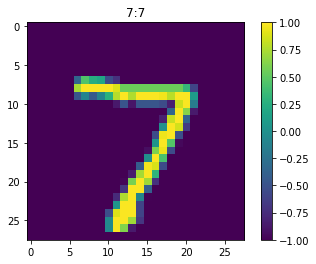

In [108]:
n = 0

yp_label = np.argmax(yp[n,:], axis = -1) # Получаем предсказание как метку 
plt.figure()
plt.imshow(test_images0[n])
plt.colorbar()
plt.grid(False)
plt.title(class_names[test_labels[n]]+':'+class_names[yp_label])
plt.show()

### **Сохраним модель на диск**

In [ ]:
# сохранить веса модели.
model.save_weights('model.h5')

# загрузить веса модели:
# model.load_weights('model.h5')


## Работа на GPU и СPU:


Выбрать из возможностей CPU/GPU

In [ ]:
# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print("  GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    
    bigger_model.fit( train_images, to_categorical(train_labels,10), epochs=1,batch_size=2000, validation_split=0.2)

  GPU:
24/24 [==============================] - 1s 22ms/step - loss: 0.1291 - accuracy: 0.9627 - val_loss: 0.1363 - val_accuracy: 0.9620


Строго GPU:

In [ ]:
print("On GPU:")
with tf.device("GPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=2,
  batch_size=2000, validation_split=0.2)

On GPU:
Epoch 1/2
24/24 [==============================] - 1s 26ms/step - loss: 0.3324 - accuracy: 0.9015 - val_loss: 0.2645 - val_accuracy: 0.9223
Epoch 2/2
24/24 [==============================] - 0s 15ms/step - loss: 0.2412 - accuracy: 0.9297 - val_loss: 0.2079 - val_accuracy: 0.9399


Строго CPU:

In [ ]:
print("On CPU:")
with tf.device("CPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=2,
  batch_size=2000, validation_split=0.2)


On CPU:
Epoch 1/2
24/24 [==============================] - 4s 178ms/step - loss: 0.1918 - accuracy: 0.9449 - val_loss: 0.1737 - val_accuracy: 0.9507
Epoch 2/2
24/24 [==============================] - 4s 169ms/step - loss: 0.1575 - accuracy: 0.9547 - val_loss: 0.1496 - val_accuracy: 0.9579


Посмотрите на время для исполнения одного шага в режиме графического ускорения 0s 15ms/step, а для только центрального процессора 4s 169ms/step (в текущем сеансе колаборатории)

### **Визуализация процесса обучения**

Посмотрим на результаты обучения через кривые обучения. Для этого используем стандартный обратный вызов моделей Керас,который возникает при использовании метода fit. Атрибут .history этого возвращаемого объекта сожержит запись значений всех потерь и метрик по всем эпохам. **Пример использования**:

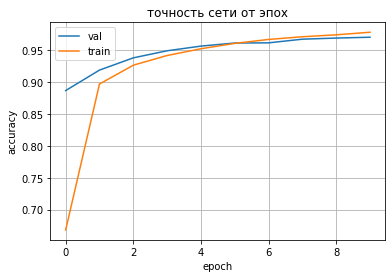

In [15]:
plt.plot(bigger_history.history['val_accuracy'] ,label='val')
plt.plot(bigger_history.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Построим еще модель (возьмем последовательное добавление слоев):

In [22]:
bigger_model2 = Sequential([])
bigger_model2.add(Dense(512, activation='relu', input_shape=(784,)))
bigger_model2.add(Dense(512, activation='linear'))
bigger_model2.add( Dense(10, activation='softmax'))


bigger_model2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_history2 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=10,
  batch_size=2000, validation_split=0.2
)

Epoch 1/10
24/24 [==============================] - 1s 16ms/step - loss: 1.1738 - accuracy: 0.6642 - val_loss: 0.3961 - val_accuracy: 0.8786
Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 0.3383 - accuracy: 0.8985 - val_loss: 0.2611 - val_accuracy: 0.9242
Epoch 3/10
24/24 [==============================] - 0s 9ms/step - loss: 0.2399 - accuracy: 0.9297 - val_loss: 0.2047 - val_accuracy: 0.9416
Epoch 4/10
24/24 [==============================] - 0s 10ms/step - loss: 0.1861 - accuracy: 0.9451 - val_loss: 0.1665 - val_accuracy: 0.9531
Epoch 5/10
24/24 [==============================] - 0s 10ms/step - loss: 0.1505 - accuracy: 0.9570 - val_loss: 0.1489 - val_accuracy: 0.9559
Epoch 6/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1264 - accuracy: 0.9633 - val_loss: 0.1286 - val_accuracy: 0.9638
Epoch 7/10
24/24 [==============================] - 0s 10ms/step - loss: 0.1050 - accuracy: 0.9699 - val_loss: 0.1166 - val_accuracy: 0.9655
Epoch 8/10
24/2

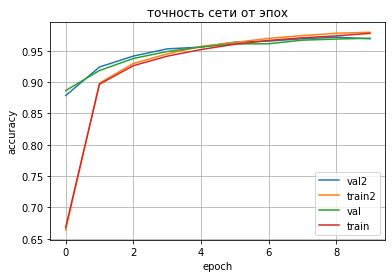

In [23]:
plt.plot(bigger_history2.history['val_accuracy'] ,label='val2')
plt.plot(bigger_history2.history['accuracy'] ,label='train2')
plt.plot(bigger_history.history['val_accuracy'] ,label='val')
plt.plot(bigger_history.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Модели учились одинаковое число эпох и они идентичны по составу, но получили не совсем одинаковые кривые обучения (чем сложней будет сеть и задача, тем больше будет разницы)

## **Задание 4**

1. Создать сеть из 2-х слоев для обучения на МНИСТ
2. Создать сеть из 4-х слоев для обучения на МНИСТ
3. Сравнить сети из примеров и сети из п.1 и п.2 по качеству (метрикам) для эквивалентного числа эпох (10)
4. Провести обучение моделей до насыщения (качество на валидации перестало расти) и сравнить финальные показатели всех моделей
5. Собрать сеть из 3-х слоев, провести обучение до насыщения метрики и оценить изменение метрик на валидации при изменении числа нейронов в первом слое ( нейронов 2 ** i (i = 2,.., 10))
6.Сделать вывод по итогам моделирования.

### Оптимизаторы

Оптимизаторы влияют на результат обучения. Пример использования одной схемы модели, но несколько перезапусков (т.е. пересоздаем нейронную сеть и проводит инициализацию весов заново) даже для одно оптимизатора порождают разные нейронные сети, т.к. начинаем с разных начальных точек.

In [24]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

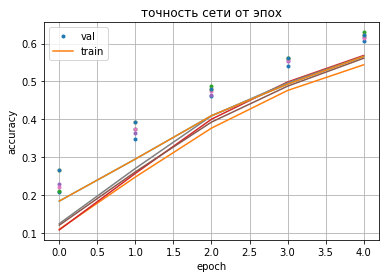

In [25]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0]

Установим главный параметр любого оптимизатора - скорость обучения learning_rate и посмотрим на результат:

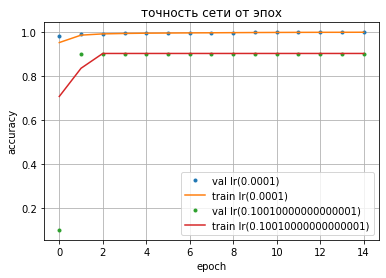

In [28]:
for i in [0,1]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(1, activation='sigmoid')  # нейронов на выходе 1 - для одного класса один выход ( бинарный классификатор)
                              ])

  bigger_model4.compile(optimizer= Adam(learning_rate=0.0001+0.1*i, beta_1=0.89) ,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=15,
                                        batch_size=2000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.',label='val lr(' +str(0.0001+0.1*i)+')')
  plt.plot(bigger_history4.history['accuracy'] ,label='train lr(' +str(0.0001+0.1*i)+')')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Результаты не идентичны - скорость обучения влияет на результат

### **Задание 5**

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


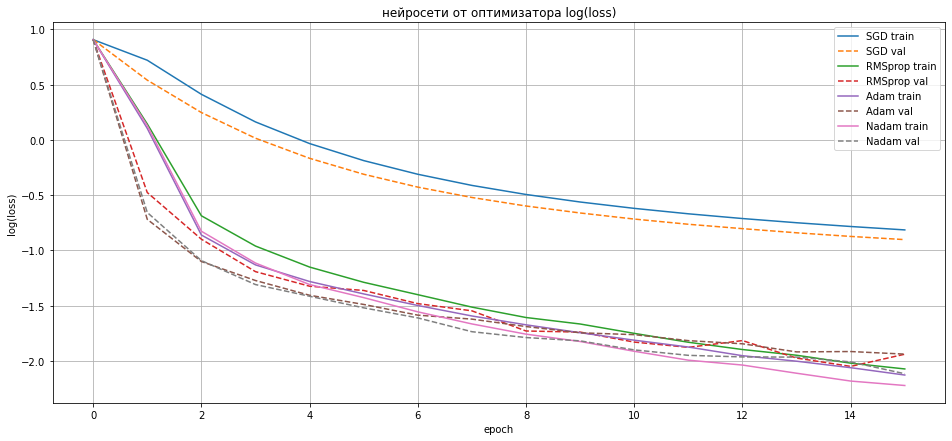

In [111]:
# создаем модель model
model = Sequential([
                      Dense( 64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


Разные оптимизаторы (даже если одна начальная точка)  = разные результаты

Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

1/1 [==============================] - 0s 43ms/step


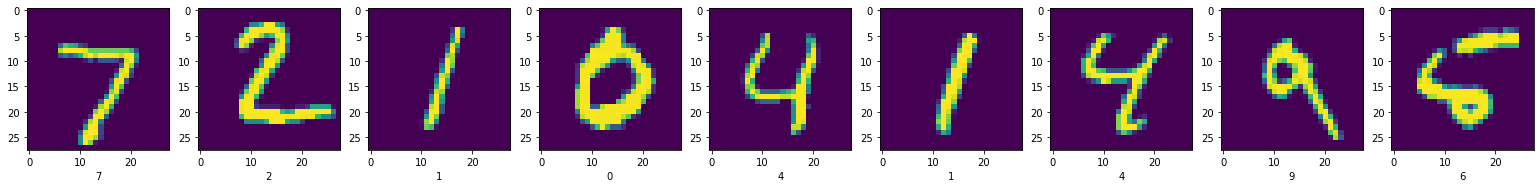

In [113]:
N = 9
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

А так выглядит выход сети до постобработки:

In [114]:
y_pred[0,:]

array([6.4442109e-05, 3.5744364e-05, 4.2549582e-05, 1.9541568e-04,
       8.2395163e-06, 7.2336320e-06, 2.3137763e-06, 9.9949920e-01,
       3.7470243e-05, 1.0737950e-04], dtype=float32)

### **Задание 6**

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

# Классификация изображений одежды

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras

from tensorflow import keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [32]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [34]:
train_images.shape

(60000, 28, 28)

In [35]:
len(train_labels)

60000

In [36]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [37]:
test_images.shape

(10000, 28, 28)

In [38]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

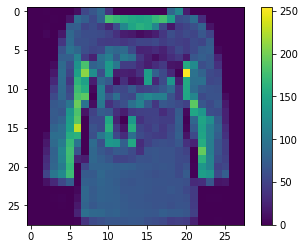

In [ ]:
plt.figure()
plt.imshow(train_images[1110])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# обработать входные признаки и целевой признак

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

## Тренировка модели





Посмотрим на возвращаемый словарь hh.history (там результаты по эпохам для потерь и метрик по обучению и тестам)

Покажем как выглядит кривая обучения

### Предсказания нейросети

 

### Проверка предсказаний

матрица ошибок (можно из sklearn)

## Использование полученной модели


возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

Сохраним модель на диск

## **Задание 8**

1. На датасет from sklearn.datasets import load_boston подготовить данные к обучению (разделить на тест и тренировочный набор, масштабировать признаки и привести их к типу float).
2. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали : меняем число слоев, число нейронов , типы активации)  - помним , что выходная активация должна позволять построить целевое свойство
3. Выберите функцию потерь и метрику из доступных в Тензорфлоу
4. Провести обучение модели и оценить результаты

## Дополнительные материалы

<ol>
    <li> https://keras.io/</li>
    <li> https://playground.tensorflow.org/ - визуализация сетей (очень симпатично - посмотрите)
    <li> сравнение фреймвоков глубокого обучения https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1 
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Саймон Хайкин — Нейронные сети: полный курс</li>
    <li>Википедия</li>
    
</ol>

Вопросы:

1. Какую проблему решает обратное распространение ошибки
2. Какие проблемы возникают при обратном распространении ошибки
3. Какую сложность может обеспечить многослойная сеть с только линейными активациями
4. Опишите достоинства и недостатки сигмоидной активации
5. Опишите достоинства и недостатки линейных активаций
6. Опишите модель формального нейрона МакКалока-Питца
7. Опишите процесс коррекции весов нейрона
8. Поясните особенности методов градиентного спуска с моментами
9. Поясните особенности методов градиентного спуска с адаптацией шага обучения 